# Quantium Virtual Internship - Retail Strategy and Analytics - Task 2

In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# Read in the data
data = pd.read_csv("QVI_data.csv")

In [8]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [12]:
# Ensure 'date' column is in datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

In [14]:
# Create a new 'month_id' column with the format yyyymm
data['month_id'] = data['DATE'].dt.strftime('%Y%m')

In [16]:
# Filter stores that are present throughout the pre-trial period (before February 2019)
pre_trial_end = '2019-01'
pre_trial_data = data[data['DATE'] < pre_trial_end]

In [23]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_id
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [54]:
# Define the metrics and calculate them
grouped_df = data.groupby(["STORE_NBR","month_id"])
tot_sales = grouped_df.TOT_SALES.sum()
n_cust = grouped_df.LYLTY_CARD_NBR.nunique()
ntrans_percust = grouped_df.TXN_ID.size()/n_cust
nchips_pertrans = grouped_df.PROD_QTY.sum()/grouped_df.TXN_ID.size()
avg_priceperunit = tot_sales/grouped_df.PROD_QTY.sum()

In [66]:
# Put the metrics together in an array
metric_arrays =  [tot_sales, n_cust, ntrans_percust, nchips_pertrans, avg_priceperunit]

# Create the metrics table fron the array 
metrics_df = pd.concat(metric_arrays, axis=1)
# Give the columns labels 
metrics_df.columns = ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit']
metrics_df = metrics_df.reset_index()

In [68]:
# Filter to select the stores with full observation periods 
#month_counts = metrics_df.groupby('STORE_NBR').month_id.nunique().reset_index()
#stores_fullobs = month_counts[month_counts.month_id ==12].STORE_NBR
#pretrial_metrics = metrics_df[metrics_df['STORE_NBR'].isin(stores_fullobs)]

# Then filter to keep only the pre-trial period data
#pretrial_metrics = pretrial_metrics.loc[pretrial_metrics.month_id < 201902]
#pretrial_metrics



In [82]:
# Define the end of the pre-trial period
pre_trial_end = 201901  # Using the format yyyymm

# Filter to stores with full observation periods
stores_with_full_obs = metrics_df.groupby('STORE_NBR').filter(lambda x: x['month_id'].nunique() == 12)['STORE_NBR'].unique()

# Filter to pre-trial period and stores with full observation periods
pre_trial_measures = metrics_df[(metrics_df['month_id'].astype(int) < pre_trial_end) & (metrics_df['STORE_NBR'].isin(stores_with_full_obs))]
pre_trial_measures

,STORE_NBR,month_id,tot_sales,n_cust,ntrans_percust,nchips_pertrans,avg_priceperunit
0,1,201807,206.90,49,1.061224,1.192308,3.337097
1,1,201808,176.10,42,1.023810,1.255814,3.261111
2,1,201809,278.80,59,1.050847,1.209677,3.717333
3,1,201810,188.10,44,1.022727,1.288889,3.243103
4,1,201811,192.60,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3158,272,201808,372.85,44,1.090909,1.770833,4.386471
3159,272,201809,304.70,32,1.125000,1.972222,4.291549
3160,272,201810,430.60,44,1.159091,1.941176,4.349495
3161,272,201811,376.20,41,1.097561,1.933333,4.324138


In [84]:
# Write a function to calculate the correlation between a trial store and all possible control stores 
# Inputs: 
    # trial (int) : the trial store to test 
    # metric_col (str) : the label of the metric column to correlate 
    # input_table (df) : the full data table of metrics to obtain the correlations with 
# Output:
    # corr_table (df) : a data frame with the year-month, trial store, control store and their correlation 
    
def calc_corr(trial, metric_col, input_table = pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)] # all stores but trial stores 
    # Keep the trial store values to perform correlation with 
    trial_vals = input_table[input_table["STORE_NBR"] == trial][metric_col].reset_index()
    corr_table = pd.DataFrame(columns = ['month_id', 'trial_store', 'control_store', 'correlation']) 
    # Find the correlation for each control store 
    for control in control_stores:
        # Keep the control store values to perform correlation with 
        control_vals = input_table[input_table["STORE_NBR"] == control][metric_col].reset_index()
        corr_row = pd.DataFrame(columns = ['month_id', 'trial_store', 'control_store', 'correlation'])
        corr_row.month_id = list(input_table.loc[input_table.STORE_NBR == control]["month_id"])
        corr_row.trial_store = trial
        corr_row.control_store = control
        corr_row.correlation = control_vals.corrwith(trial_vals, axis=1)
        corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe 
    return (corr_table)

In [86]:
trial_stores = [77, 86, 88]
corr_table = pd.DataFrame(columns = ['month_id', 'trial_store', 'control_store', 'correlation'])
for store in trial_stores:
    corr_section = calc_corr(store, ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit'] )
    corr_table = pd.concat([corr_table, corr_section])

In [88]:
corr_table

,month_id,trial_store,control_store,correlation
0,201807,77,1,0.070544
1,201808,77,1,0.027332
2,201809,77,1,0.002472
3,201810,77,1,-0.019991
4,201811,77,1,0.030094
...,...,...,...,...
7,201902,88,272,0.577384
8,201903,88,272,0.553713
9,201904,88,272,0.567352
10,201905,88,272,0.580163


In [90]:
# Write a function to calculate the normalised distance magnitude between a trial store and all possible control stores 
# Inputs: 
    # trial (int) : the trial store to test 
    # metric_col (str) : the label of the metric column to correlate 
    # input_table (df) : the full data table of metrics to obtain the correlations with 
# Output:
    # corr_table (df) : a data frame with the year-month, trial store, control store and their normalised distance  
    
def calc_magdist(trial, metric_col, input_table = pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)] # all stores but the trials 
    dist_table = pd.DataFrame() # to store the distances for each store and month 
    for control in control_stores: # calculate for each control store 
        dist_row = pd.DataFrame()
        # Calculate the distance as an absolute value 
        dist_row = abs(input_table[input_table["STORE_NBR"] == trial].reset_index()[metric_col]\
                        - input_table[input_table["STORE_NBR"] == control].reset_index()[metric_col])
        dist_row.insert(0,'month_id', list(input_table.loc[input_table.STORE_NBR == trial]["month_id"]))
        dist_row.insert(1,'trial_store', trial)
        dist_row.insert(2,'control_store', control)
        dist_table = pd.concat([dist_table, dist_row])
        
    for col in metric_col: # then loop over each column to find the max and min distances to normalise 
        maxdist = dist_table[col].max()
        mindist = dist_table[col].min()
        dist_table[col] = 1-(dist_table[col] - mindist)/(maxdist-mindist) # normalised distance measure 
        # also give an average magnitude over all metrics per month and store pair 
    dist_table['mag_measure'] = dist_table[metric_col].mean(axis=1)  
    return (dist_table)

In [92]:
# Write a function to generate a table of averaged correlations, distance and scores over the pretrial months for each store
# Inputs:
    # trial (int) : the trial store to test 
    # metric_col (str) : the metric label to calculate the scores for 
    # input_table (df) : the data to calculate the scores with in the pre-trial period 
# Output:
    # avg_corrmag (df) : a table with the correlations, distance and scores averaged over the pretrial months for each store
def calc_corrdist_score (trial, metric_col, input_table=pretrial_metrics):
    # Calculate the correlations and magnitudes for all months 
    corr_vals = calc_corr(trial, metric_col, input_table)
    mag_vals = calc_magdist(trial, metric_col, input_table)
    mag_vals = mag_vals.drop(metric_col, axis=1) # For one metric, the two columns will be duplicates so drop one 
    
    # Combine correlations and magnitudes together to one df
    combined_corr_dist = pd.merge(corr_vals, mag_vals, on=["month_id", "trial_store", "control_store"])
    
    # Average correlations and distances over the pre-trial months 
    avg_corrmag = combined_corr_dist.groupby(["trial_store", "control_store"]).mean().reset_index()
    
    # Find a combined score by taking the weighted average of the correlations and magnitudes 
    corr_weight = 0.5
    avg_corrmag['combined_score'] = corr_weight*avg_corrmag['correlation'] + (1-corr_weight)*avg_corrmag['mag_measure']
    
    return(avg_corrmag)

In [94]:
# Write a function to output the 5 stores with the highest averaged scores combining the tot_sales and n_cust metrics
# for a given trial store over the pre-trial period 
# Inputs:
    # trial (int) : the trial store to test 
# Output:
    # scores (df) : a sorted table with the 5 highest composite scores of possible control stores 
    
def find_highestscore(trial):
    # Obtain the scores for the tot_sales and n_cust metrics separately 
    scores_tot_sales = calc_corrdist_score (trial, ['tot_sales'])
    scores_n_cust = calc_corrdist_score (trial, ['n_cust'])
    # Create a data table to store the composite results in - stores are also 
    scores_control = pd.DataFrame()
    scores_control['control_store'] = scores_tot_sales.control_store
    # Calculate the composite scores 
    scores_control['correlation'] = 0.5*scores_tot_sales.correlation + 0.5*scores_n_cust.correlation
    scores_control['mag_measure'] = 0.5*scores_tot_sales.mag_measure + 0.5*scores_n_cust.mag_measure
    scores_control['scores'] = 0.5*scores_tot_sales.combined_score + 0.5*scores_n_cust.combined_score
    return(scores_control.sort_values(by = 'scores', ascending = False).reset_index(drop = True).head(5))

In [96]:
# Now find the control stores with the highest scores for each of the trial stores 
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highestscore(trial))
    print()

Trial store:  77
   control_store  correlation  mag_measure    scores
0            233          1.0     0.973992  0.986996
1             41          1.0     0.971117  0.985558
2            188          1.0     0.964026  0.982013
3             53          1.0     0.963668  0.981834
4             46          1.0     0.963402  0.981701

Trial store:  86
   control_store  correlation  mag_measure    scores
0            155     0.916667     0.958582  0.937624
1            229     0.916667     0.955519  0.936093
2            109     0.916667     0.943437  0.930052
3            227     0.916667     0.942881  0.929774
4            225     0.916667     0.940506  0.928586

Trial store:  88
   control_store  correlation  mag_measure    scores
0             40          1.0     0.933746  0.966873
1             26          1.0     0.906031  0.953016
2             58          1.0     0.900580  0.950290
3             81          1.0     0.892550  0.946275
4             72          1.0     0.889848  0.

In [98]:
def make_plots(storepair, metric_col):
    trial = storepair[0]
    control = storepair[1]
    trial_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == trial][['month_id', 'STORE_NBR', metric_col]]
    trial_plot = trial_plot.rename(columns = {metric_col: metric_col+'_trial'})
    control_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == control][['month_id', 'STORE_NBR', metric_col]]
    control_plot = control_plot.rename(columns = {metric_col: metric_col+'_control'})
    
    other_stores = pretrial_metrics.loc[(pretrial_metrics.STORE_NBR != 77)][['month_id', 'STORE_NBR', metric_col]]
    other_stores = other_stores.loc[(pretrial_metrics.STORE_NBR != 233)]
    plot_other = other_stores.groupby('month_id')[metric_col].mean()

    ax = control_plot.plot.line(x = "month_id", y = metric_col+'_control', use_index=False, label = 'Control '+metric_col)
    ax_trial = trial_plot.plot.line(x = "month_id", y = metric_col+'_trial', use_index=False, ax=ax, label = 'Trial '+metric_col)
    ax_other = plot_other.plot.line(use_index = False, ax=ax, label = 'Other '+ metric_col)
    ax.set_ylabel(metric_col)
    plt.legend(title = 'STORE_NBR', loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    positions = (0,1,2,3,4,5,6)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901')
    plt.xticks (positions, labels)
    titlestr = 'The Trial Store ' + str(storepair[0]) + ' and Control Store ' + str(storepair[1]) + ' in the Pre-Trial Period'
    ax.set_title(titlestr)
    

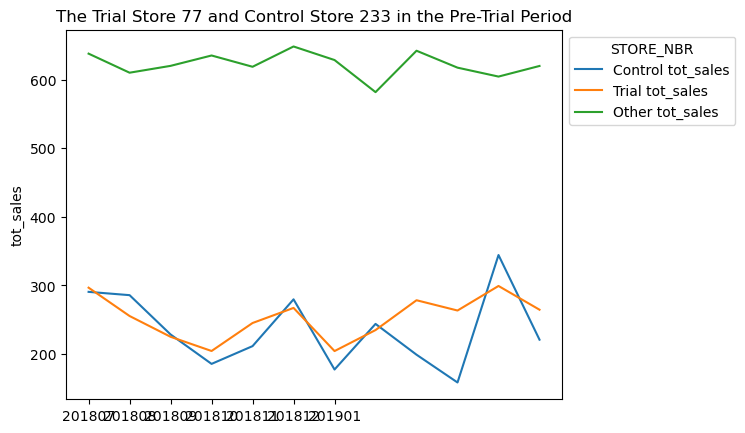

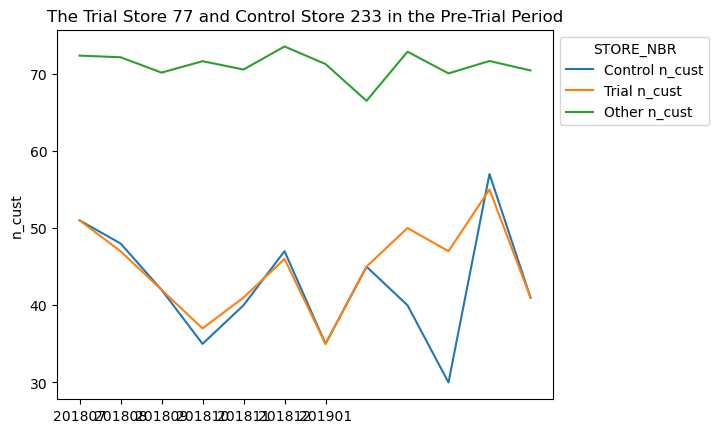

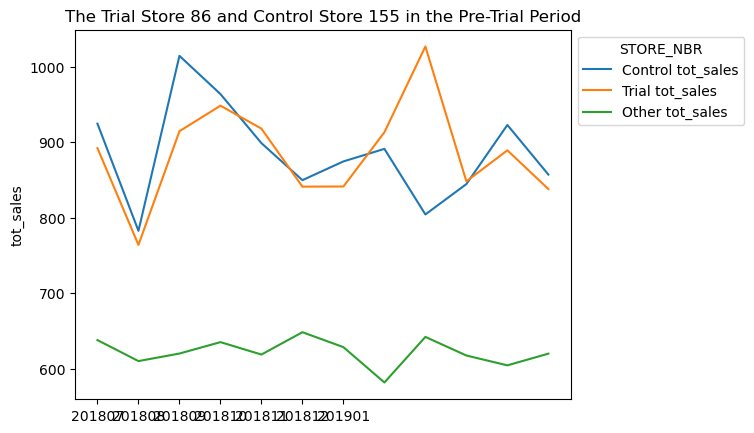

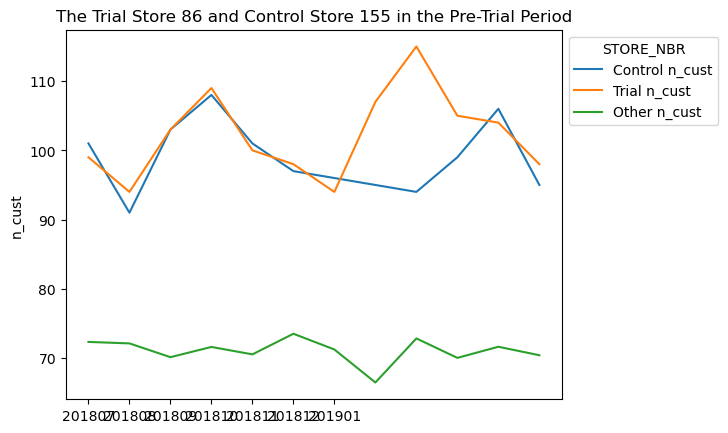

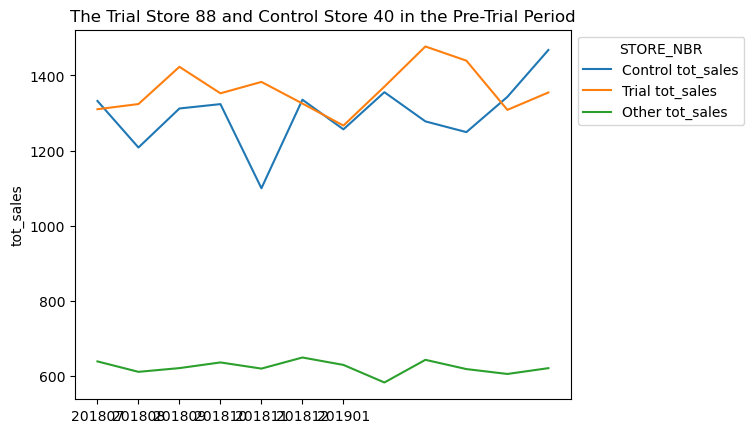

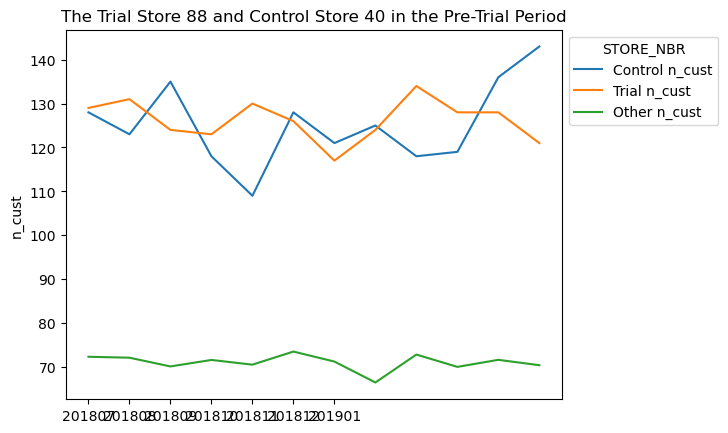

In [100]:
storepair = [[77, 233], [86, 155], [88, 40]]
metric_col = ['tot_sales', 'n_cust']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

In [102]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['tot_sales'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['tot_sales'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['tot_sales'].sum()

In [108]:
# Extract the control store data from the df and scale according to the store 
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "month_id", 'tot_sales']]
scaled_control233.tot_sales *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "month_id", 'tot_sales']]
scaled_control155.tot_sales *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "month_id", 'tot_sales']]
scaled_control40.tot_sales *= scale_store88

# Combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledsales_control = scaledsales_control.rename(columns = {'tot_sales':'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'}) 
# Get the trial period of scaled control stores 
scaledsales_control_trial = scaledsales_control[(scaledsales_control.month_id.astype(int)>=201902) & (scaledsales_control.month_id.astype(int)<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores 
trialsales = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "month_id", 'tot_sales']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'}) 
trialsales_trial = trialsales[(trialsales.month_id.astype(int) >= 201902) & (trialsales.month_id.astype(int) <= 201904)].reset_index(drop = True)

In [110]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year   
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'tot_sales']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,month_id,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,312.613817,77,296.8,-0.051898
1,233,201808,307.451979,77,255.5,-0.184570
2,233,201809,245.832537,77,225.2,-0.087606
3,233,201810,199.698610,77,204.5,0.023758
4,233,201811,227.551028,77,245.3,0.075072


In [128]:
from scipy import stats

In [130]:
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.
pretrial_percentdiff = percentdiff[percentdiff.month_id.astype(int) < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['sales_percent_diff'].agg('std').reset_index()
dof = 6 # 7 months of data - 1 

for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.month_id.astype(int) < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['sales_percent_diff'].agg('std')
    mean =  pretrial['sales_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.month_id.astype(int) >= 201902) & (percentdiff.month_id.astype(int) <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.month_id.unique():
        xval = trialperiod[trialperiod.month_id == month]['sales_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()
    
# Generate the t-statistic for the 95% percentile with 6 dof
critical_t_value = stats.t.ppf(1 - 0.05, dof)
print ('95th percentile value:',critical_t_value)

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.717624340180979
201903  :  3.0459736050037596
201904  :  4.735744461299656

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  1.4140306688633362
201903  :  7.1395245929265165
201904  :  0.8865690146878357

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.5481696106278142
201903  :  1.009161833484289
201904  :  0.9711691661108331

95th percentile value: 1.9431802803927816


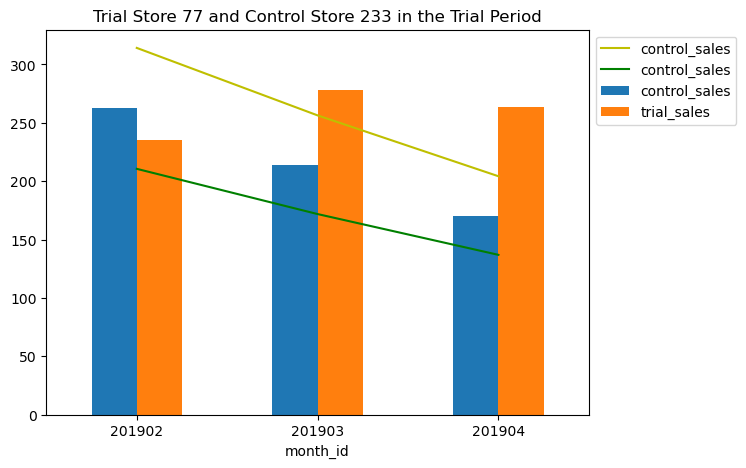

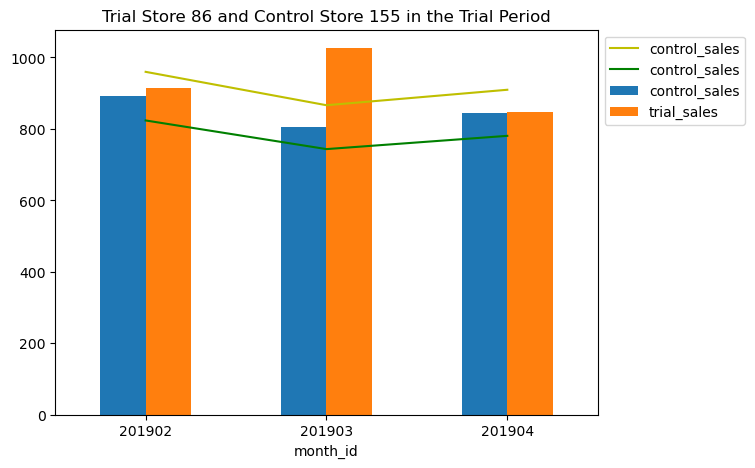

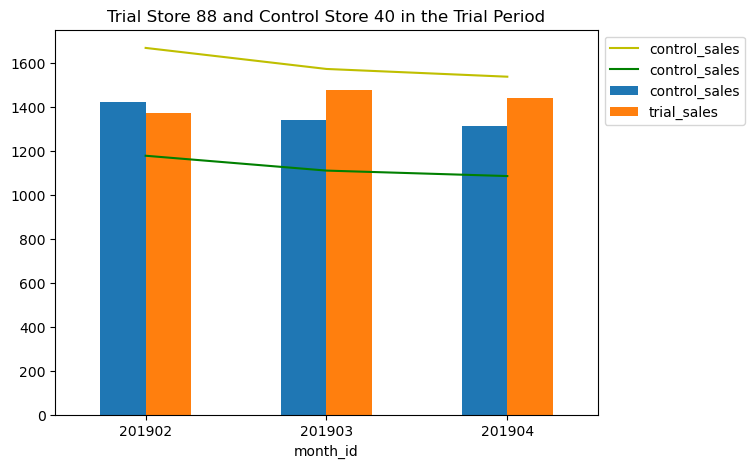

In [134]:
# First do bar graphs during the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    
    # Plot the bar chart of sales performance 
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.month_id.astype(int) >= 201902) & (percentdiff.month_id.astype(int) <= 201904)]\
                    [['month_id', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.month_id.astype(int) >= 201902) & (percentdiff.month_id.astype(int) <= 201904)]\
                    [['month_id', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    toplot = plot_control[["month_id", "control_sales"]].merge(plot_trial[["month_id", "trial_sales"]],on="month_id").set_index("month_id")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.month_id.astype(int) < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['month_id', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['month_id', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'month_id', y = 'control_sales',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'month_id', y = 'control_sales', color='g', figsize=(7, 5), use_index=False, ax = ax)    
    
    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

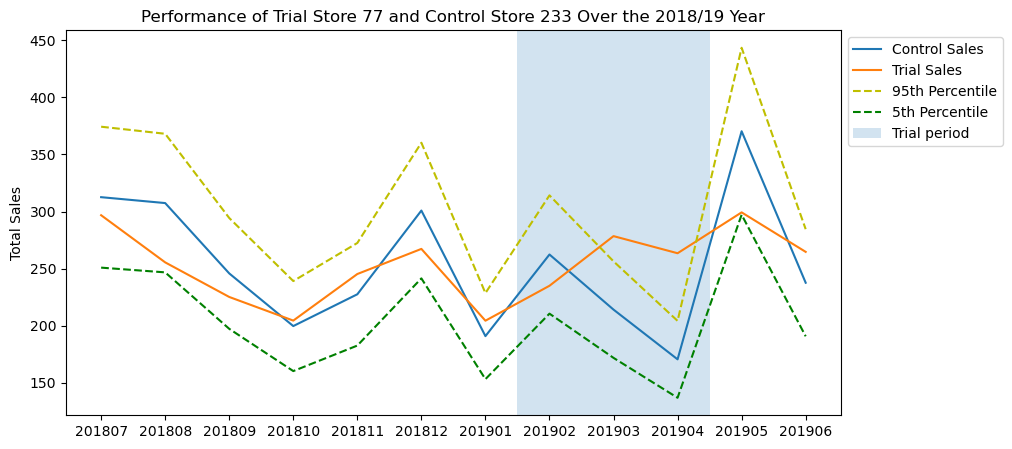

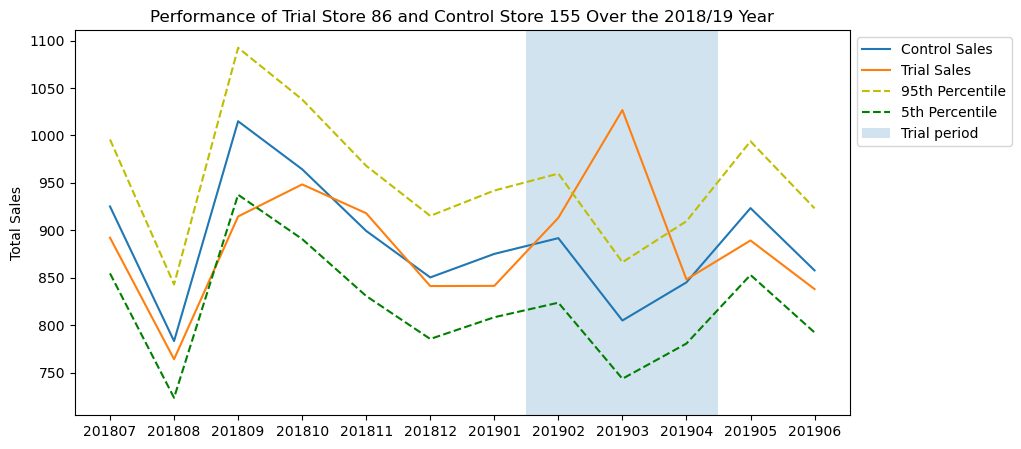

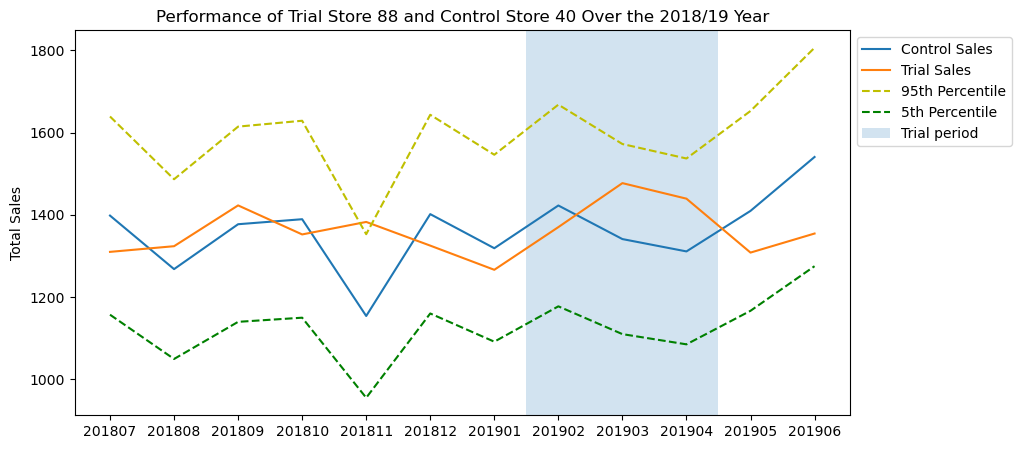

In [138]:
# Then do line graphs during the whole year - for the report 
from matplotlib.patches import Rectangle
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    
    # Plot the line graph of sales performance 
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['month_id', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['month_id', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    
    ax = plot_control.plot.line(x = "month_id", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "month_id", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.month_id.astype(int) < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['month_id', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['month_id', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'month_id', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'month_id', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')    
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))
    
    # Other plot features
    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

In [140]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['n_cust'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['n_cust'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['n_cust'].sum()

In [142]:
# Extract the control store data from the df and scale according to the store 
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "month_id", 'n_cust']]
scaled_control233.n_cust *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "month_id", 'n_cust']]
scaled_control155.n_cust *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "month_id", 'n_cust']]
scaled_control40.n_cust *= scale_store88

# Combine the scaled control stores to a single df
scaledncust_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledncust_control = scaledncust_control.rename(columns = {'n_cust':'scaled_n_cust', 'STORE_NBR': 'CONTROL_NBR'}) 
# Get the trial period of scaled control stores 
scaledncust_control_trial = scaledncust_control[(scaledsales_control.month_id.astype(int)>=201902) & (scaledsales_control.month_id.astype(int)<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores 
trialncust = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "month_id", 'n_cust']].reset_index(drop = True)
trialncust = trialncust.rename(columns = {'STORE_NBR': 'TRIAL_NBR'}) 
trialncust_trial = trialncust[(trialncust.month_id.astype(int) >= 201902) & (trialsales.month_id.astype(int) <= 201904)].reset_index(drop = True)

In [144]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year   
percentdiff = scaledncust_control.copy()
percentdiff[['TRIAL_NBR', 'n_cust_t']] = trialncust[['TRIAL_NBR', 'n_cust']]
percentdiff = percentdiff.rename(columns = {'scaled_n_cust' : 'scaled_n_cust_c'})
percentdiff['cust_percent_diff'] = (percentdiff.n_cust_t-percentdiff.scaled_n_cust_c)\
                                    /(0.5*((percentdiff.scaled_n_cust_c+percentdiff.n_cust_t)))
percentdiff.head()

,CONTROL_NBR,month_id,scaled_n_cust_c,TRIAL_NBR,n_cust_t,cust_percent_diff
0,233,201807,53.594912,77,51,-0.049618
1,233,201808,50.442270,77,47,-0.070653
2,233,201809,44.136986,77,42,-0.049618
3,233,201810,36.780822,77,37,0.005941
4,233,201811,42.035225,77,41,-0.024935


In [146]:
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.
pretrial_percentdiff = percentdiff[percentdiff.month_id.astype(int) < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['cust_percent_diff'].agg('std').reset_index()
dof = 6 # 7 months of data - 1 

for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.month_id.astype(int) < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['cust_percent_diff'].agg('std')
    mean =  pretrial['cust_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.month_id.astype(int) >= 201902) & (percentdiff.month_id.astype(int) <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.month_id.unique():
        xval = trialperiod[trialperiod.month_id == month]['cust_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()
    
# Generate the t-statistic for the 95% percentile with 6 dof
print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.19906927444165426
201903  :  8.027475669961097
201904  :  16.191901763760665

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  6.226119123497383
201903  :  10.54273904840202
201904  :  3.0775232882842287

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.3591566949497693
201903  :  1.2575438526556513
201904  :  0.6095245015214831

95th percentile value: 1.9431802803927816


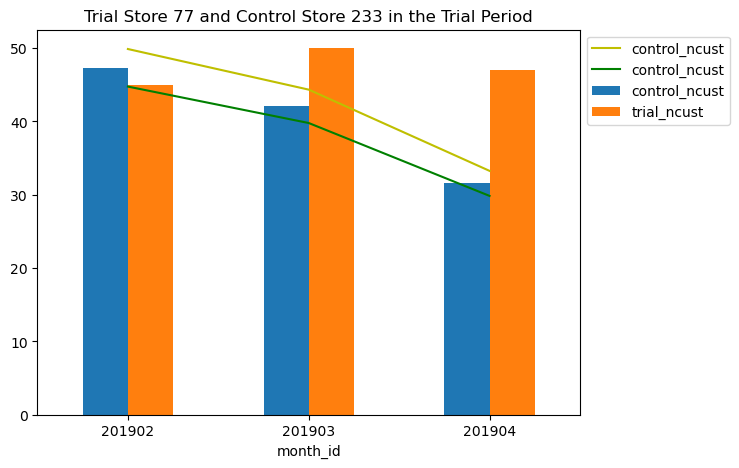

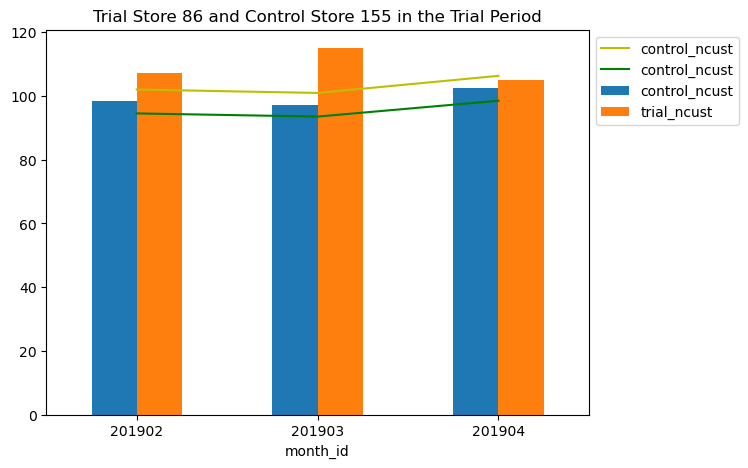

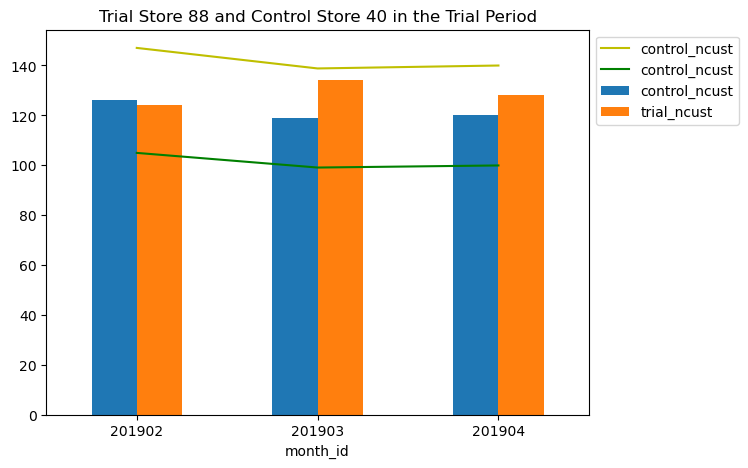

In [148]:
# First do bar charts to focus on the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]    
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.month_id.astype(int) >= 201902) & (percentdiff.month_id.astype(int) <= 201904)]\
                    [['month_id', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.month_id.astype(int) >= 201902) & (percentdiff.month_id.astype(int) <= 201904)]\
                    [['month_id', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    toplot = plot_control[["month_id", "control_ncust"]].merge(plot_trial[["month_id", "trial_ncust"]],on="month_id").set_index("month_id")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.month_id.astype(int) < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['month_id', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['month_id', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'month_id', y = 'control_ncust',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'month_id', y = 'control_ncust', color='g', figsize=(7, 5), use_index=False, ax = ax)    
    
    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

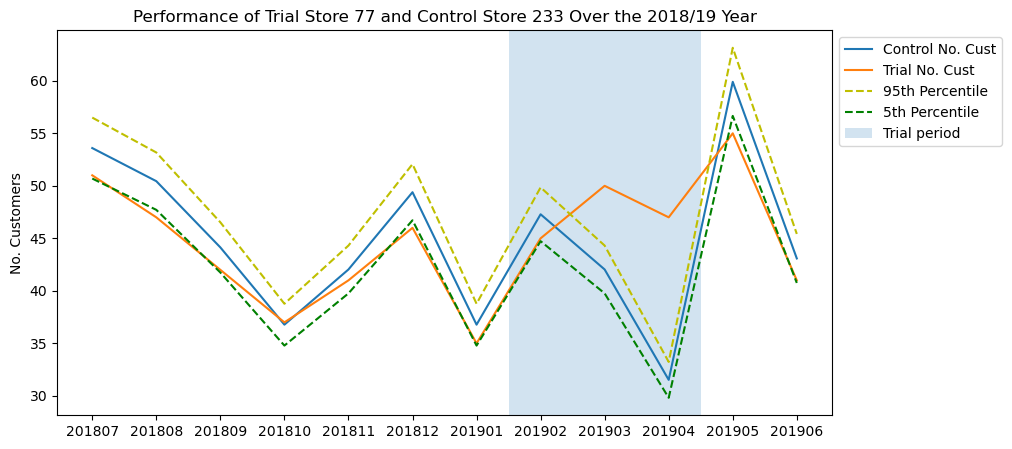

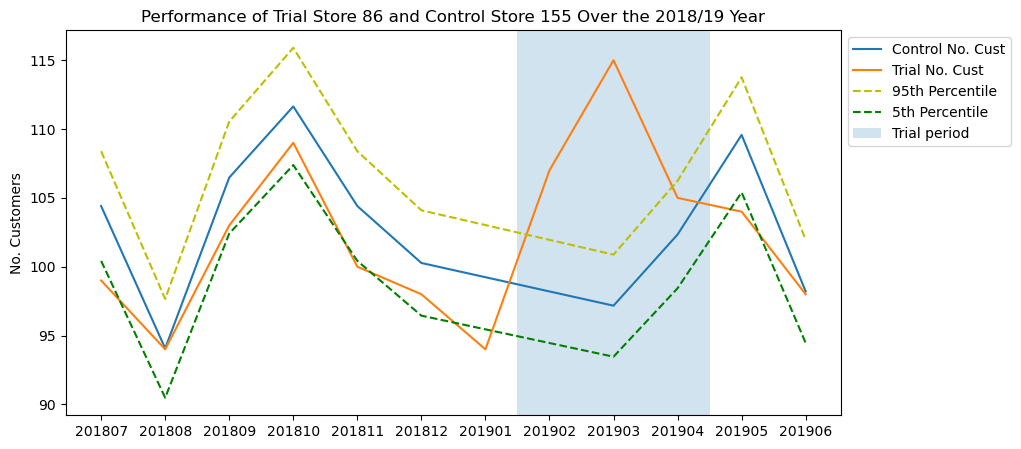

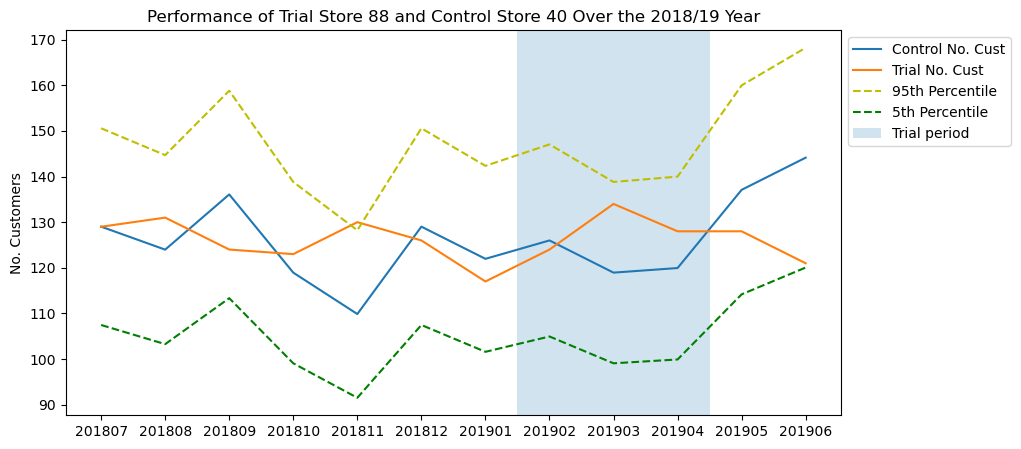

In [150]:
# Then do line graphs to show a full year's trend 
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]    
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)]\
                    [['month_id', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)]\
                    [['month_id', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    
    ax = plot_control.plot.line(x = "month_id", y = 'control_ncust', use_index=False, label = 'Control No. Cust')
    ax_trial = plot_trial.plot.line(x = "month_id", y = 'trial_ncust', use_index=False, ax=ax, label = 'Trial No. Cust')
    
    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.month_id.astype(int) < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['month_id', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['month_id', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'month_id', y = 'control_ncust',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'month_id', y = 'control_ncust', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')    
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))  
    
    # Other plot features
    ax.set_ylabel('No. Customers')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()